In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import glob

In [2]:
Num_P = 5
Num_N = 8
def read_performance(files):
    Perfs = {'RMAT': np.zeros((Num_P, Num_N)), 'SSCA2': np.zeros((Num_P, Num_N))}
    get_P_ix = lambda P : int(P) - 14
    get_N_idx = lambda N : int(np.log2(int(N)))
    idx = lambda P, N : (get_P_ix(P), get_N_idx(N))

    for fname in files:
        P, N, matrix = fname.rsplit('/')[-1].split('_')
        matrix = matrix.split('.')[0]
        with open(fname) as f:        
            cont = f.read()
            perf = cont.split('\n')[0]
            perf = float(perf[13:-5].rstrip())
            Perfs[matrix][idx(P, N)] = perf
    
    return Perfs

In [3]:
Perfs_i = [read_performance(glob.glob('out1/*.out')),
           #read_performance(glob.glob('out2/*.out')),
           #read_performance(glob.glob('out3/*.out')),
           #read_performance(glob.glob('out4/*.out'))
          ]
keys = ['RMAT', 'SSCA2']
Perfs = {key: np.mean([Perfs_i[i][key] for i in range(len(Perfs_i))], axis=0) for key in keys}

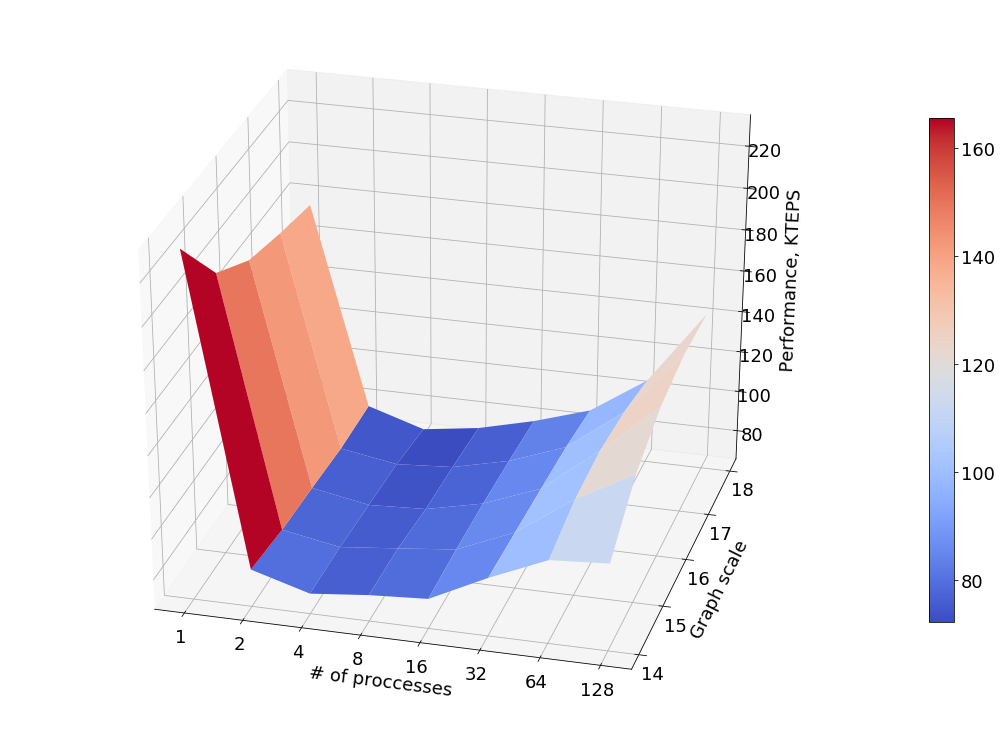

In [4]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig)

Xs = [i for i in range(Num_N)]
Xs_tick = [2 ** i for i in range(Num_N)]
Ys = np.arange(14, 19)

X, Y = np.meshgrid(Xs, Ys)
surf = ax.plot_surface(X, Y, Perfs['RMAT'], cmap='coolwarm')

fig.colorbar(surf, shrink=0.7)

ax.view_init(elev=30, azim=-75)

ax.set_xlabel('# of proccesses', labelpad=10)
ax.set_xticks(Xs)
ax.set_xticklabels(Xs_tick)
ax.set_ylabel('Graph scale', labelpad=10)
ax.set_yticks(Ys)
ax.set_zlabel('Performance, KTEPS', labelpad=15)

plt.show()